# Ceneo Analyzer

## Załadowanie bibliotek


In [2]:

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


## Lista kodów produktów, o których zostały pobrane opinii

In [3]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

138331381


## Wczytanie od użytkownika kodu produktu dla którego ma zostać przeprowadzona analiza

In [4]:

product_id = input("Podaj kod produktu: ")

## Wczytanie do obiektu pandas.DataFrame opinii o produkcie o podanym kodzie

In [6]:

opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r: "Brak rekomendacji" if r is None else r)

## Podstawowe statystyki

In [7]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda c: None if not c else c).count()
average_stars = opinions.stars.mean()

## Histogram częstości poszczególnych ocen produktu

In [8]:
stars_distribution = opinions.stars.value_counts().reindex(list(np.arange(0,5.5,0.5)), fill_value = 0)
stars_distribution

stars
0.0     0
0.5     1
1.0     0
1.5     0
2.0     0
2.5     1
3.0     0
3.5     0
4.0     2
4.5     2
5.0    12
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

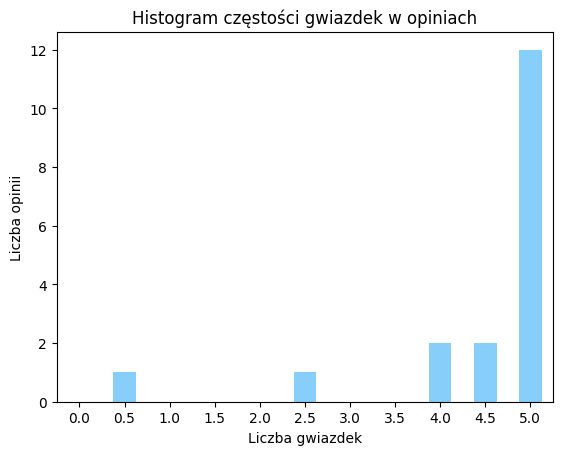

In [9]:
stars_distribution.plot.bar(color="lightskyblue")
plt.title("Histogram częstości gwiazdek w opiniach")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)

## Udział poszczególncyh rekomendacji w ogólnej liczbie opinii

In [10]:
recommendations_distribution = opinions.recommendation.value_counts(dropna=False).reindex(["Polecam", "Brak rekomendacji", "Nie polecam"], fill_value = 0)
recommendations_distribution

recommendation
Polecam              16
Brak rekomendacji     0
Nie polecam           2
Name: count, dtype: int64

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

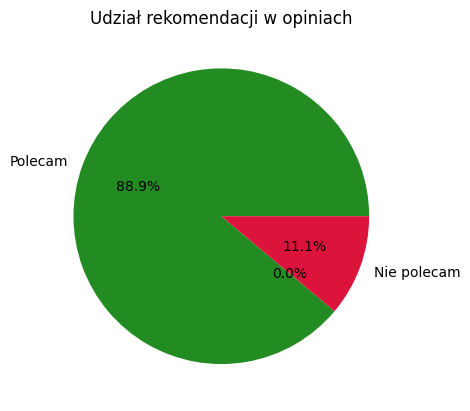

In [11]:

recommendations_distribution.plot.pie(
    colors = ["forestgreen", "gold", "crimson"],
    label = "",
    autopct = "%1.1f%%"
)
plt.title("Udział rekomendacji w opiniach")